In [2]:
import wave
import matplotlib.pyplot as plt
import imp
import scipy.signal as sig
import numpy as np
import struct

import wavecontroller
import pitch
import bufconv
import alignpitch
import wavegenerater

%matplotlib inline

In [266]:
imp.reload(wavecontroller)
wavecontroller.show_info("data/original/a.wav")

チャンネル数: 2
サンプル幅: 2
サンプリング周波数: 44100
フレーム数: 105408
パラメータ: (2, 2, 44100, 105408, 'NONE', 'not compressed')
長さ（秒）: 2.39020408163


In [192]:
result = sig.correlate([1,4,2,3,3,2], [1,4,2,3,3,2], mode="valid")
result[:]

array([43])

array([ 95, 143, 275, 409, 469, 536, 587, 663, 711, 843])

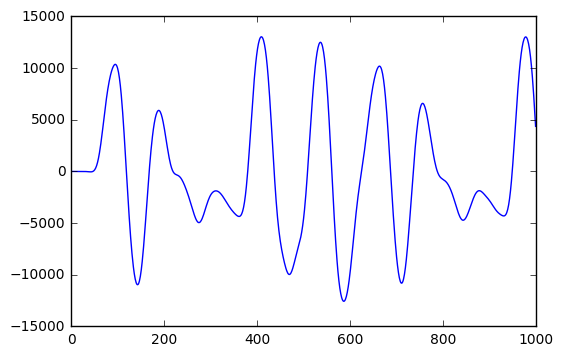

In [333]:
imp.reload(wavecontroller)
imp.reload(pitch)
wavefile = "a2.wav"
data = wavecontroller.smoothing(wavecontroller.get_data("data/original/"+wavefile), 4)

plt.plot(data[:1000])

#pitch.find_first_peak(data)
pitch.find_peaks(data, local_width=100, min_peak_distance=30)[0][:10]

700.0


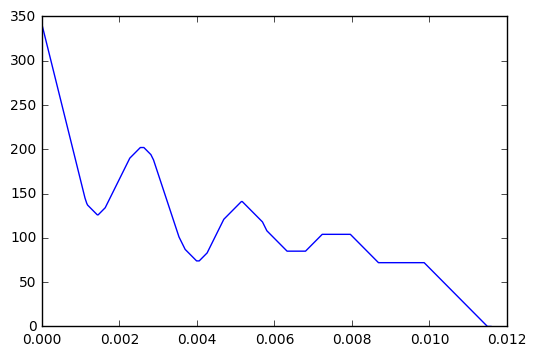

In [334]:
imp.reload(wavecontroller)
imp.reload(pitch)
wavefile = "a2.wav"
data = wavecontroller.smoothing(wavecontroller.get_data("data/original/"+wavefile), 4)

pitch.calc_pitch(data, 44100)

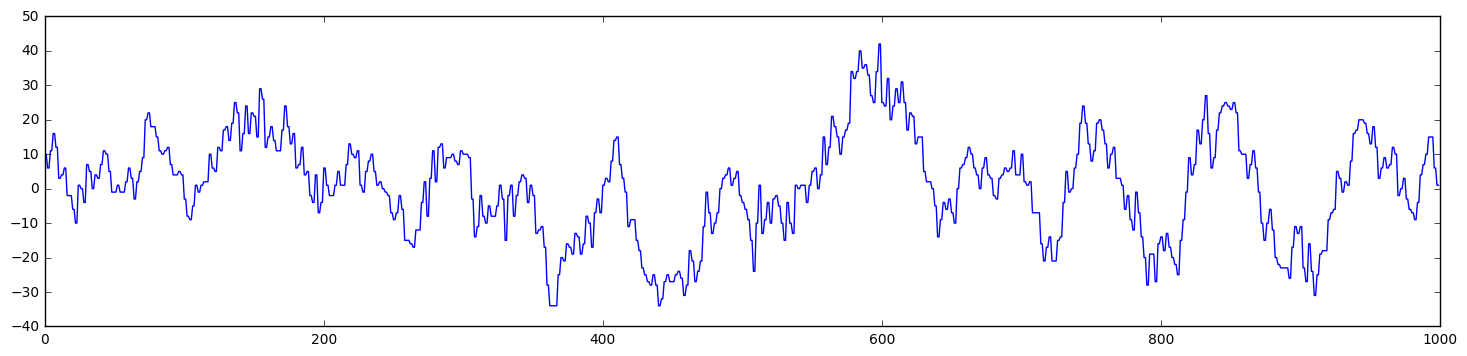

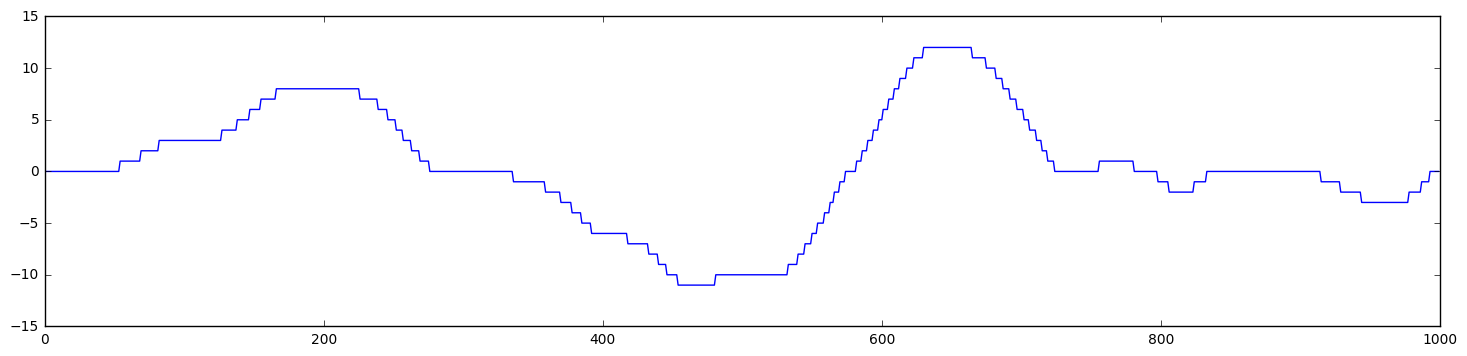

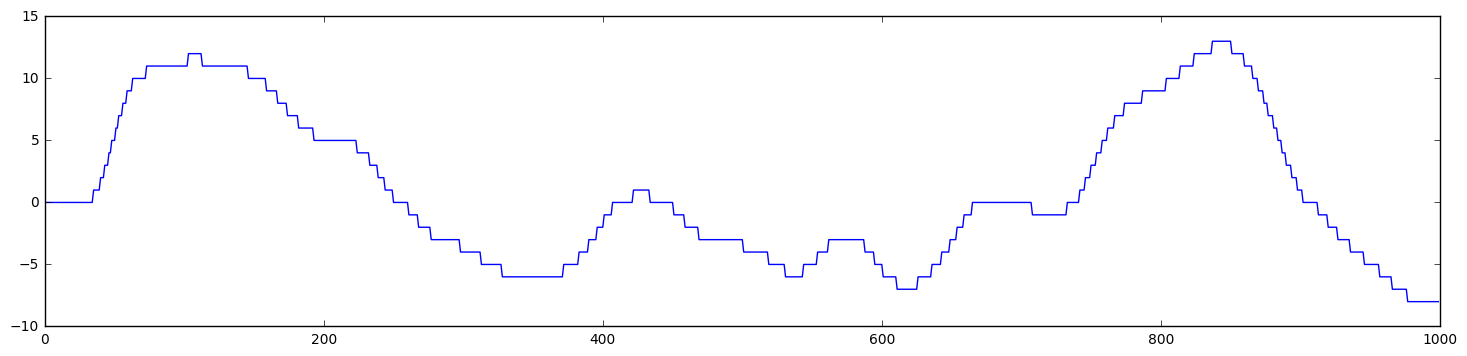

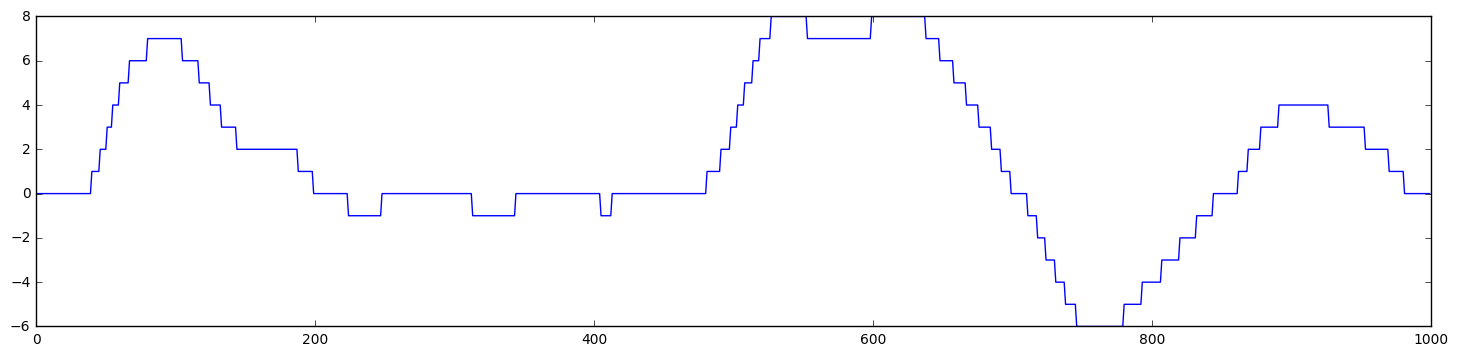

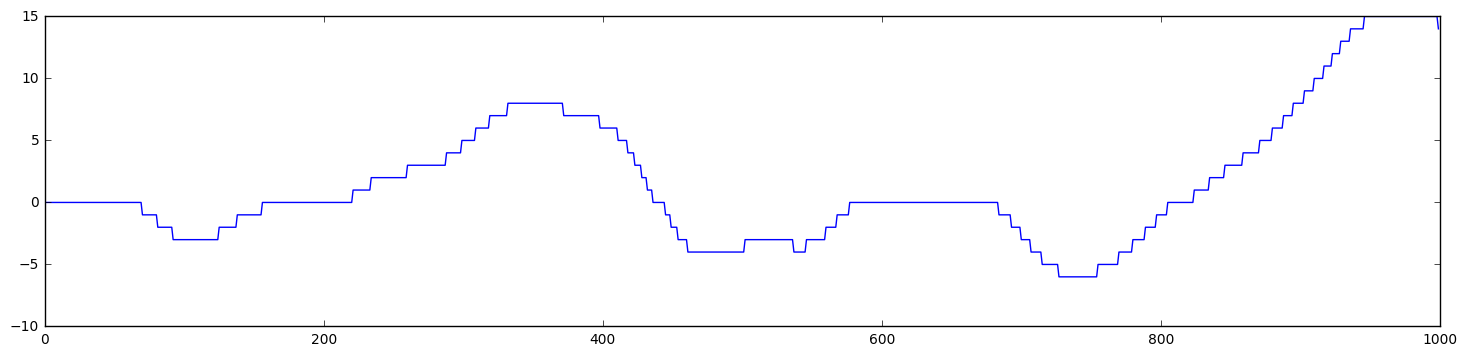

328978


In [228]:
imp.reload(wavecontroller)

INPUT_SAMPLE_FREQ = 44100
PITCH_FRAME = 80

ROUGHNESS1 = 100
ROUGHNESS2 = 500
ROUGHNESS3 = 2000
ROUGHNESS4 = 7000 # 使わないほうがいいかも

filename = "arayuru"
data = wavecontroller.get_data("data/"+filename+"/"+filename+".wav")
wavecontroller.show_image(data[:1000])

s1_data = wavecontroller.smoothing(data, ROUGHNESS1)
wavecontroller.show_image(s1_data[:1000])
wavecontroller.save_file("data/"+filename+"/s1_"+filename+".wav", s1_data, INPUT_SAMPLE_FREQ)

s2_data = wavecontroller.smoothing(data, ROUGHNESS2)
wavecontroller.show_image(s2_data[:1000])
wavecontroller.save_file("data/"+filename+"/s2_"+filename+".wav", s2_data, INPUT_SAMPLE_FREQ)

s3_data = wavecontroller.smoothing(data, ROUGHNESS3)
wavecontroller.show_image(s3_data[:1000])
wavecontroller.save_file("data/"+filename+"/s3_"+filename+".wav", s3_data, INPUT_SAMPLE_FREQ)

s4_data = wavecontroller.smoothing(data, ROUGHNESS4)
wavecontroller.show_image(s4_data[:1000])
wavecontroller.save_file("data/"+filename+"/s4_"+filename+".wav", s4_data, INPUT_SAMPLE_FREQ)

print(len(data))

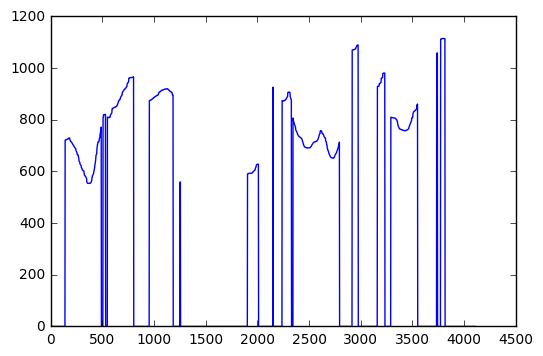

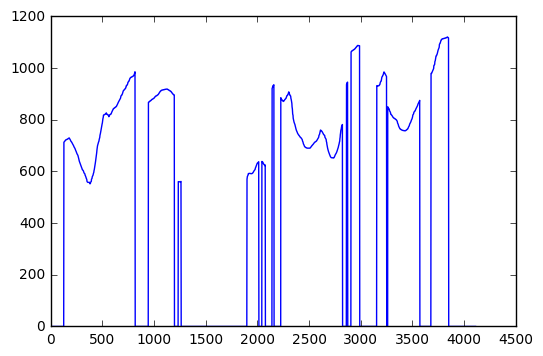

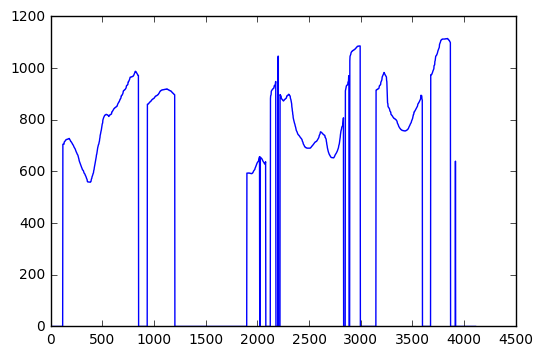

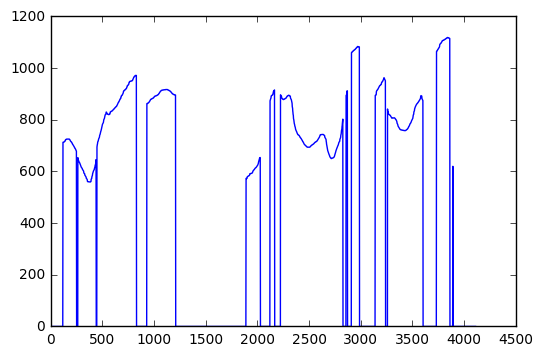

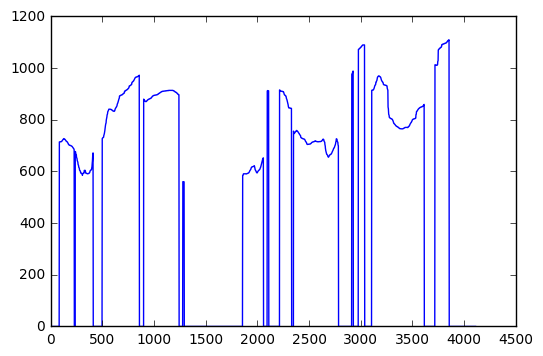

4113


In [226]:
imp.reload(bufconv)

filename = "arayuru"

buf_file = "data/"+filename+"/"+filename+".pitch"
results = bufconv.read_float(buf_file)
x = np.arange(len(results))
y = results
plt.plot(x, y)
plt.show()

buf_file = "data/"+filename+"/s1_"+filename+".pitch"
results = bufconv.read_float(buf_file)
x = np.arange(len(results))
y = results
plt.plot(x, y)
plt.show()

buf_file = "data/"+filename+"/s2_"+filename+".pitch"
results = bufconv.read_float(buf_file)
x = np.arange(len(results))
y = results
plt.plot(x, y)
plt.show()

buf_file = "data/"+filename+"/s3_"+filename+".pitch"
results = bufconv.read_float(buf_file)
x = np.arange(len(results))
y = results
plt.plot(x, y)
plt.show()

buf_file = "data/"+filename+"/s4_"+filename+".pitch"
results = bufconv.read_float(buf_file)
x = np.arange(len(results))
y = results
plt.plot(x, y)
plt.show()

print(len(y))

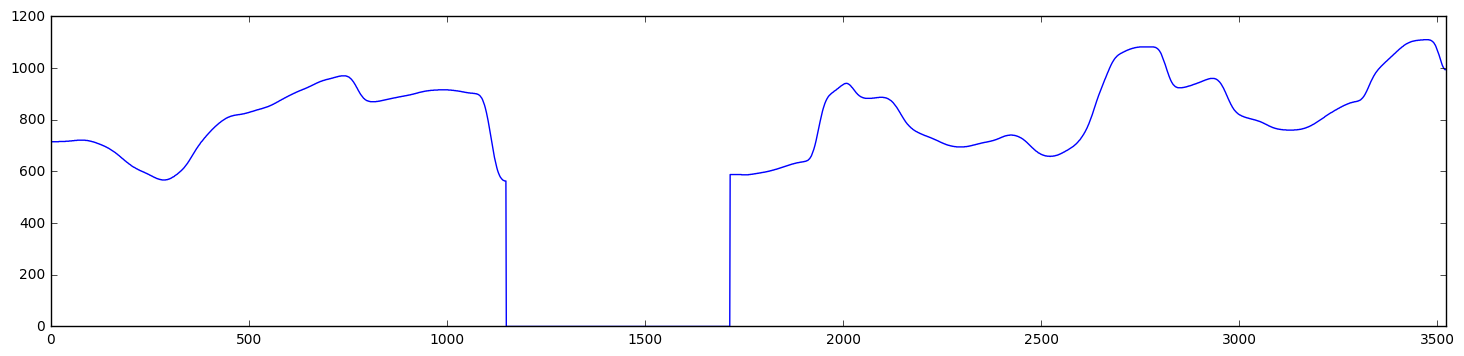

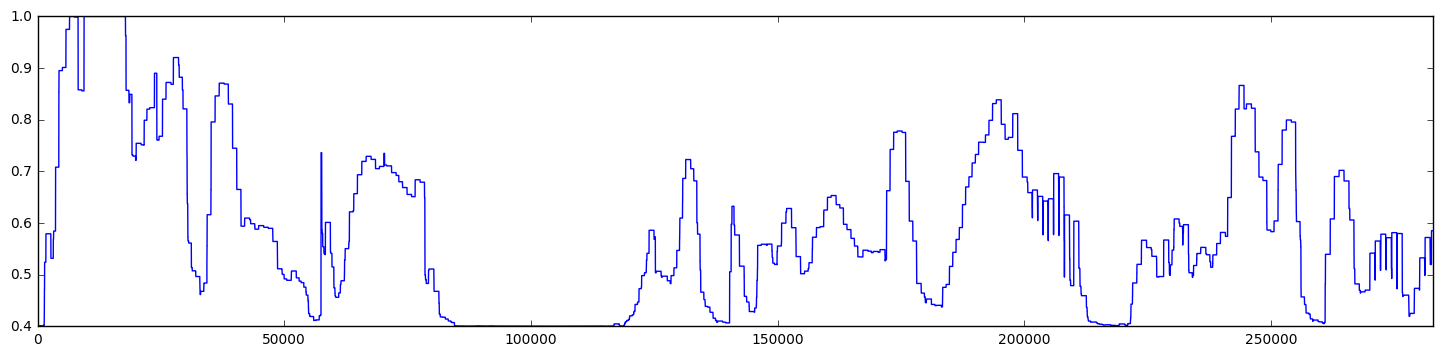

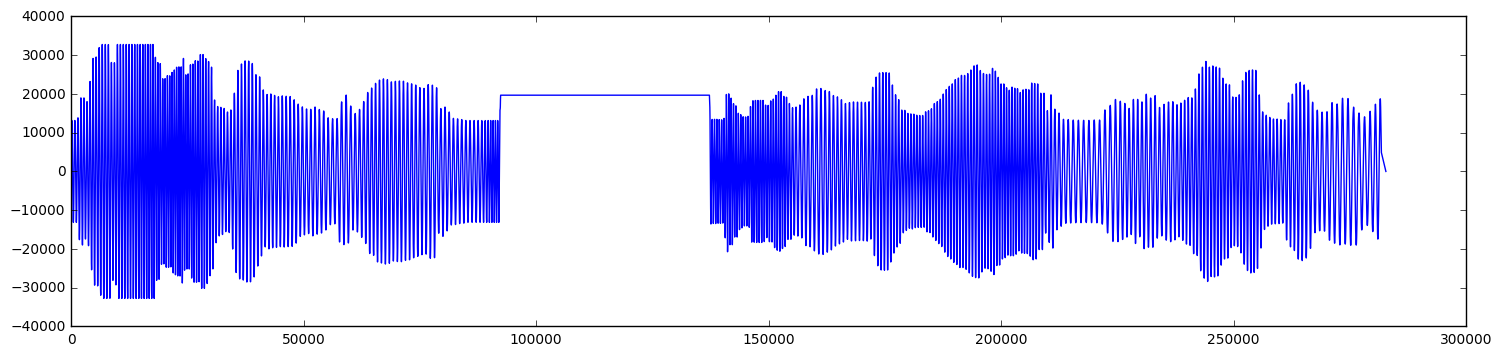

In [367]:
imp.reload(wavecontroller)
imp.reload(alignpitch)
imp.reload(wavegenerater)
np.set_printoptions(threshold=np.inf)
filename = "arayuru"

buf_files = ["data/"+filename+"/"+filename+".pitch",
                     "data/"+filename+"/s1_"+filename+".pitch",
                     "data/"+filename+"/s2_"+filename+".pitch",
                     "data/"+filename+"/s3_"+filename+".pitch",
                     "data/"+filename+"/s4_"+filename+".pitch"]
results, remove_idxs = alignpitch.merge_pitch_file(buf_files)
bufconv.write_float("data/"+filename+"/m_"+filename+".pitch", results)

# plot
plt.figure(figsize=(18,4))
plt.xlim(0, len(results))
plt.plot(results)
plt.show()

# calculate amplification
data = wavecontroller.get_data("data/"+filename+"/"+filename+".wav")
amps = wavecontroller.calc_amp(data)
remove_idxs = np.array(np.array(map(lambda n: np.arange(n*PITCH_FRAME, n*PITCH_FRAME+PITCH_FRAME), remove_idxs)).flat)
amps = np.delete(amps, remove_idxs)

# plot
plt.figure(figsize=(18,4))
plt.xlim(0, len(amps))
plt.plot(amps)
plt.show()

# generate sounds
freq_data = wavegenerater.pitch2freq(results)
data = wavegenerater.sin_wave(freq_data, amps, PITCH_FRAME)
wavecontroller.save_file("data/"+filename+"/test2.wav", data, wavegenerater.SAMPLE_FREQ)

# plot
wavecontroller.show_image(data)

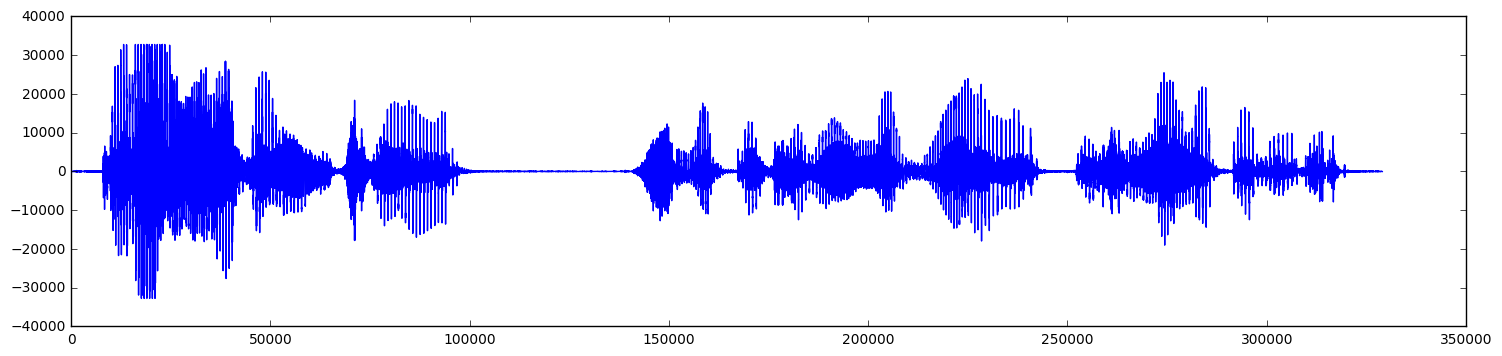

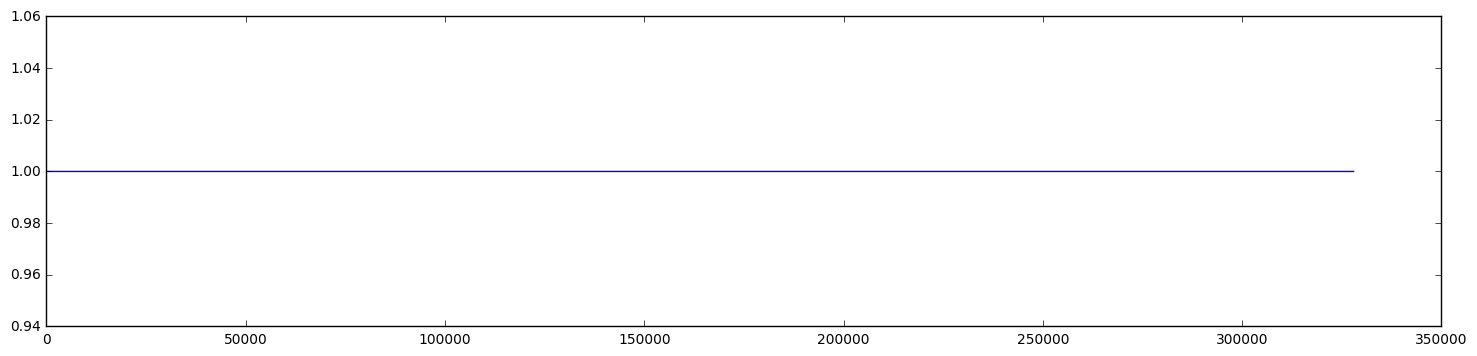

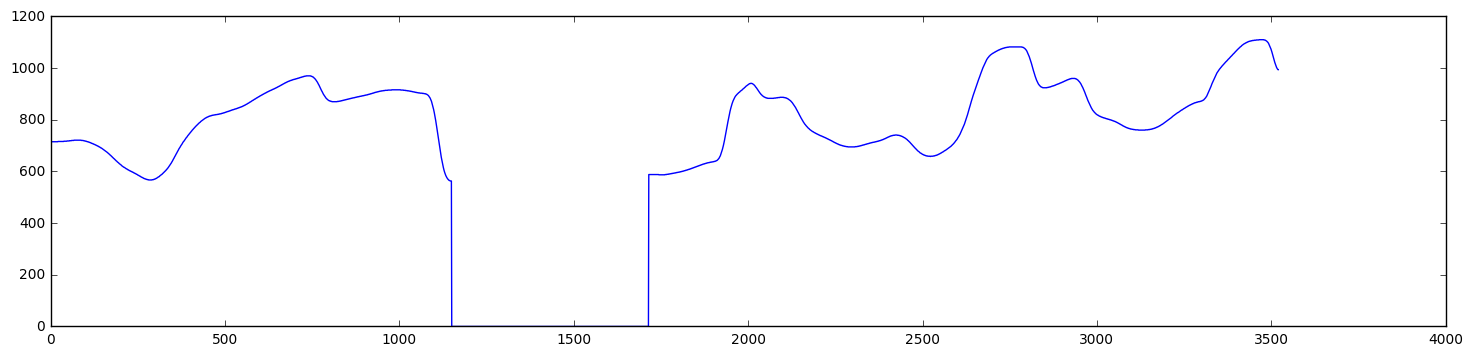

In [319]:
imp.reload(wavecontroller)
imp.reload(bufconv)

data = wavecontroller.get_data("data/arayuru/arayuru.wav")
wavecontroller.show_image(data)
amps = wavecontroller.calc_amp(data)
plt.figure(figsize=(18,4))
plt.plot(amps)
plt.show()
pitches = bufconv.read_float("data/arayuru/m_arayuru.pitch")
plt.figure(figsize=(18,4))
plt.plot(pitches)
plt.show()

In [284]:
x = np.array([5, 12])
frame = 5
np.array(np.array(map(lambda n: np.arange(n*frame, n*frame+frame), x)).flat)

array([25, 26, 27, 28, 29, 60, 61, 62, 63, 64])

In [338]:
x = []
x.append(np.array([1,2,3]))

array([1, 2, 3])